In [1]:
#Importing warning library to avoid any warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
import pandas as pd
df=pd.read_csv('D:/Python file/Practice Project Datasets/Week2/juvenile_arrest.csv')  #Path location of the dataset
df.head()  #Checking out the top 5 rows of the dataset

,State_Name,Year,Sub_Group_Name,Above_Primary_but_below_Matric/Higher_Secondary,Illiterate,Matric/Higher_Secondary&above,Education_Total,Primary
0,Andaman & Nicobar Islands,2001,1. Education,12,0,0,16,4
1,Andhra Pradesh,2001,1. Education,178,640,64,1565,683
2,Arunachal Pradesh,2001,1. Education,39,16,12,137,70
3,Assam,2001,1. Education,74,91,0,253,88
4,Bihar,2001,1. Education,87,190,56,586,253


In [3]:
df.shape    #Checking the dimensions of the dataset

(350, 8)

In [4]:
df.columns   #Checking out the columns of the dataset

Index(['State_Name', 'Year', 'Sub_Group_Name',
       'Above_Primary_but_below_Matric/Higher_Secondary', 'Illiterate',
       'Matric/Higher_Secondary&above', 'Education_Total', 'Primary'],
      dtype='object')

# Dataset Description

-> The dataset explains about the arrest of juveniles on the basis of their education. This data has been collected from all        over India.

-> The years of these records are from 2001 to 2010

-> There are totally 350 records along with 8 columns and they are as follows:

1.State_Name - Name of the state

2.Year - the year of juvenile arrest

3.Sub_Group_Name - arrest on what basis

4.Above_Primary_but_below_Matric/Higher_Secondary - number of people having Education level between primary and higher                                                               secondary

5.Illiterate - number of Uneducated people

6.Matric/Higher_Secondary&above - number of people having Education level above higher secondary

7.Education_Total - Total number of juveniles arrested on the basis of Education

8.Primary - Juveniles who have primary education

-> Our main aim of this project is to predict the total number of juveniles arrested on the basis of their Education and since all of the given data is continuous, we need to analyze using regression process.

In [5]:
df.info()    #Checking the datatype of all the columns present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 8 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   State_Name                                       350 non-null    object
 1   Year                                             350 non-null    int64 
 2   Sub_Group_Name                                   350 non-null    object
 3   Above_Primary_but_below_Matric/Higher_Secondary  350 non-null    int64 
 4   Illiterate                                       350 non-null    int64 
 5   Matric/Higher_Secondary&above                    350 non-null    int64 
 6   Education_Total                                  350 non-null    int64 
 7   Primary                                          350 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 22.0+ KB


There are two columns having categorical data and we can convert into numeric data by using Encoding Technique

In [6]:
df.isnull().sum()   #Checking for null values in the dataset

State_Name                                         0
Year                                               0
Sub_Group_Name                                     0
Above_Primary_but_below_Matric/Higher_Secondary    0
Illiterate                                         0
Matric/Higher_Secondary&above                      0
Education_Total                                    0
Primary                                            0
dtype: int64

As we can see, there are no missing values in the dataset

In [7]:
#Drop Sub_Group_Name column as Education is the only data which is common for all records
df.drop('Sub_Group_Name',axis=1,inplace=True)
df.head()

,State_Name,Year,Above_Primary_but_below_Matric/Higher_Secondary,Illiterate,Matric/Higher_Secondary&above,Education_Total,Primary
0,Andaman & Nicobar Islands,2001,12,0,0,16,4
1,Andhra Pradesh,2001,178,640,64,1565,683
2,Arunachal Pradesh,2001,39,16,12,137,70
3,Assam,2001,74,91,0,253,88
4,Bihar,2001,87,190,56,586,253


In [8]:
#Checking the unique values in State_Name column
df.State_Name.unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [9]:
#Checking the unique values in Year column
df.Year.unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
      dtype=int64)

# Exploratory Data Analysis

In [10]:
#Importing Matplotlib and Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

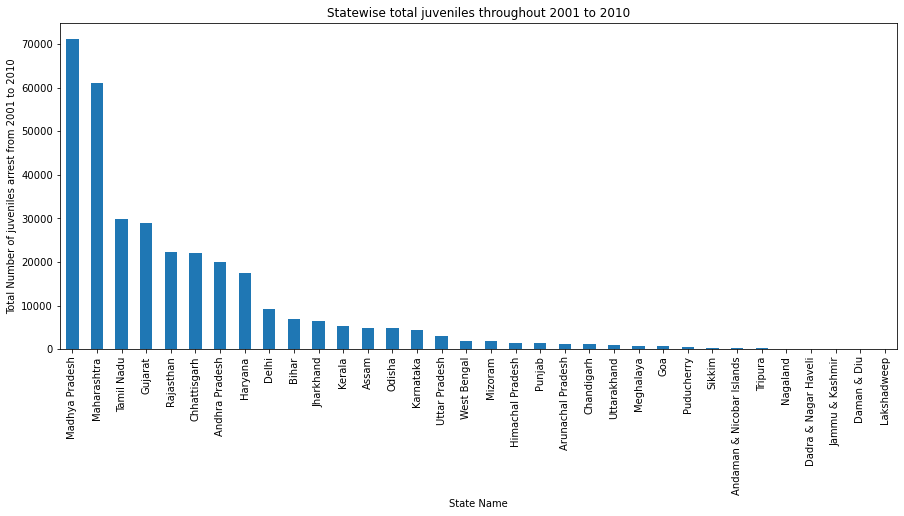

In [11]:
#Let's plot the Juvenlies arrested by states throughout 2001 to 2010
victims_by_state = df.groupby('State_Name').sum()
victims_by_state.drop('Year', axis = 1, inplace = True)

plt.subplots(figsize = (15, 6))
ct = victims_by_state[victims_by_state['Education_Total']>0]['Education_Total'].sort_values(ascending=False)

#Plotting bar plot
ax = ct.plot.bar()
ax.set_xlabel('State Name')
ax.set_ylabel('Total Number of juveniles arrest from 2001 to 2010')
ax.set_title('Statewise total juveniles throughout 2001 to 2010')
plt.show()

These are the total number of juveniles arrested on the basis of States from years 2001 to 2010. Highest people were arrested from Madhya Pradesh and lowest people were arrested from Tripura. 

No one was arrested from Nagaland, Dadra & Nagar Haveli, Jammu & Kashmir, Daman & Diu and Lakshadweep

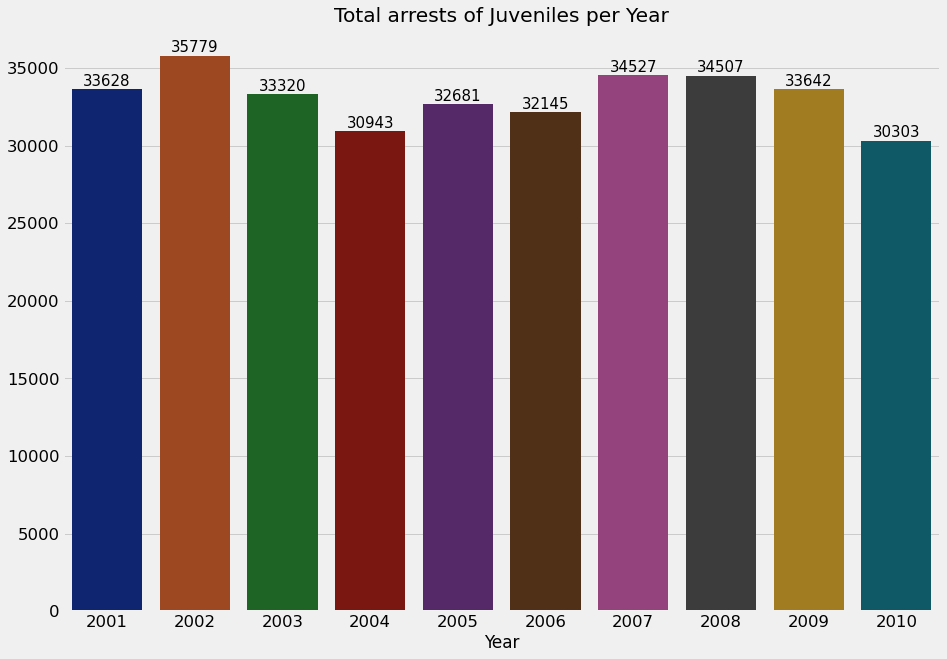

In [12]:
df_j = df.groupby(['Year'])['Education_Total'].sum().reset_index() #grouping
sns.set_context("talk")
plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,10))

ax = sns.barplot(x = 'Year' , y = 'Education_Total', data = df_j,palette= 'dark') #plotting bar graph
plt.title("Total arrests of Juveniles per Year")
ax.set_ylabel('')
for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')

The graph explains about the year wise arrest of juveniles, on the basis of education, from 2001 to 2010. Nearly 30000+ juveniles are arrested every year from all over India

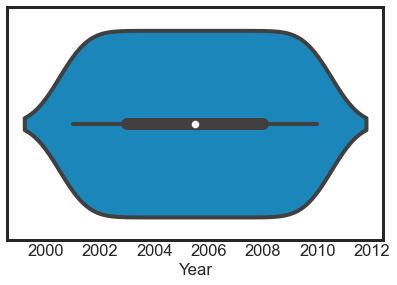

In [13]:
sns.set_style('white')
sns.violinplot(x='Year',data=df)

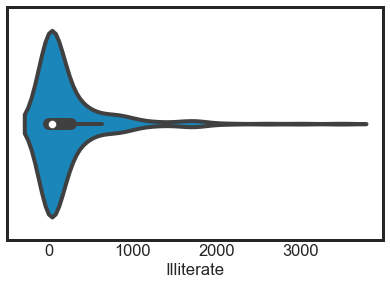

In [14]:
sns.violinplot(x='Illiterate',data=df)

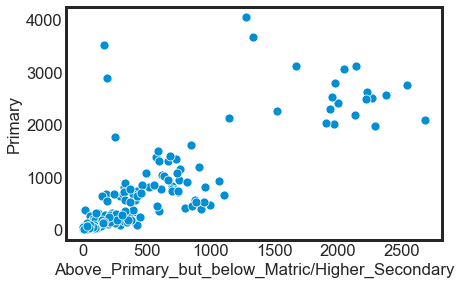

In [15]:
#Scatter plot between 2 variables
sns.scatterplot(x='Above_Primary_but_below_Matric/Higher_Secondary',y='Primary',data=df)

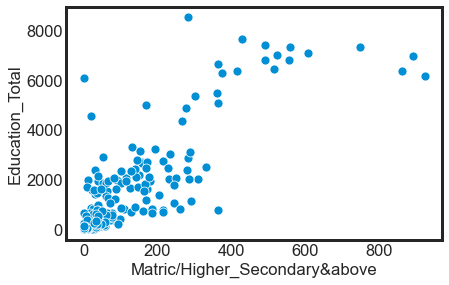

In [16]:
sns.scatterplot(x='Matric/Higher_Secondary&above',y='Education_Total',data=df)

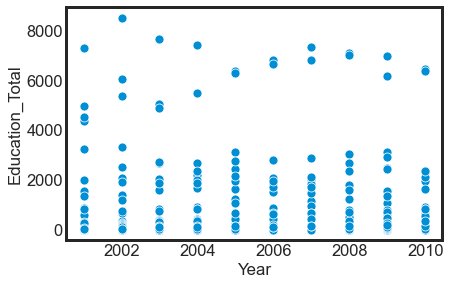

In [17]:
sns.scatterplot(x='Year',y='Education_Total',data=df)

From the above scatter plot, we can see that the relationship between the data is non-linear and it can be due to skewnessm presence of outliers, etc.

# Multivariate Analysis

In [18]:
df.describe()    #Statistical summary of the dataset

,Year,Above_Primary_but_below_Matric/Higher_Secondary,Illiterate,Matric/Higher_Secondary&above,Education_Total,Primary
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,2005.500000,267.534286,245.320000,72.742857,947.071429,361.474286
std,2.876393,502.655513,469.000792,138.401837,1684.668450,702.475519
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,8.000000,2.000000,0.000000,36.250000,12.000000
50%,2005.500000,47.500000,35.000000,12.500000,145.000000,50.500000
75%,2008.000000,290.250000,262.250000,66.750000,954.750000,308.500000
max,2010.000000,2684.000000,3488.000000,925.000000,8536.000000,4051.000000


Observations:

1.There is a huge difference between the mean and the median values as there are many outliers present

2.Except Year column, all other columns have min value of 0

In [19]:
#Checking correlation of the dataset
corr=df.corr()  #corr() function provides the correlation value of each column
corr

,Year,Above_Primary_but_below_Matric/Higher_Secondary,Illiterate,Matric/Higher_Secondary&above,Education_Total,Primary
Year,1.000000,0.042318,-0.049166,0.103486,-0.008495,-0.038217
Above_Primary_but_below_Matric/Higher_Secondary,0.042318,1.000000,0.718038,0.876195,0.927487,0.856720
Illiterate,-0.049166,0.718038,1.000000,0.642742,0.893842,0.835537
Matric/Higher_Secondary&above,0.103486,0.876195,0.642742,1.000000,0.851432,0.788793
Education_Total,-0.008495,0.927487,0.893842,0.851432,1.000000,0.970012
Primary,-0.038217,0.856720,0.835537,0.788793,0.970012,1.000000


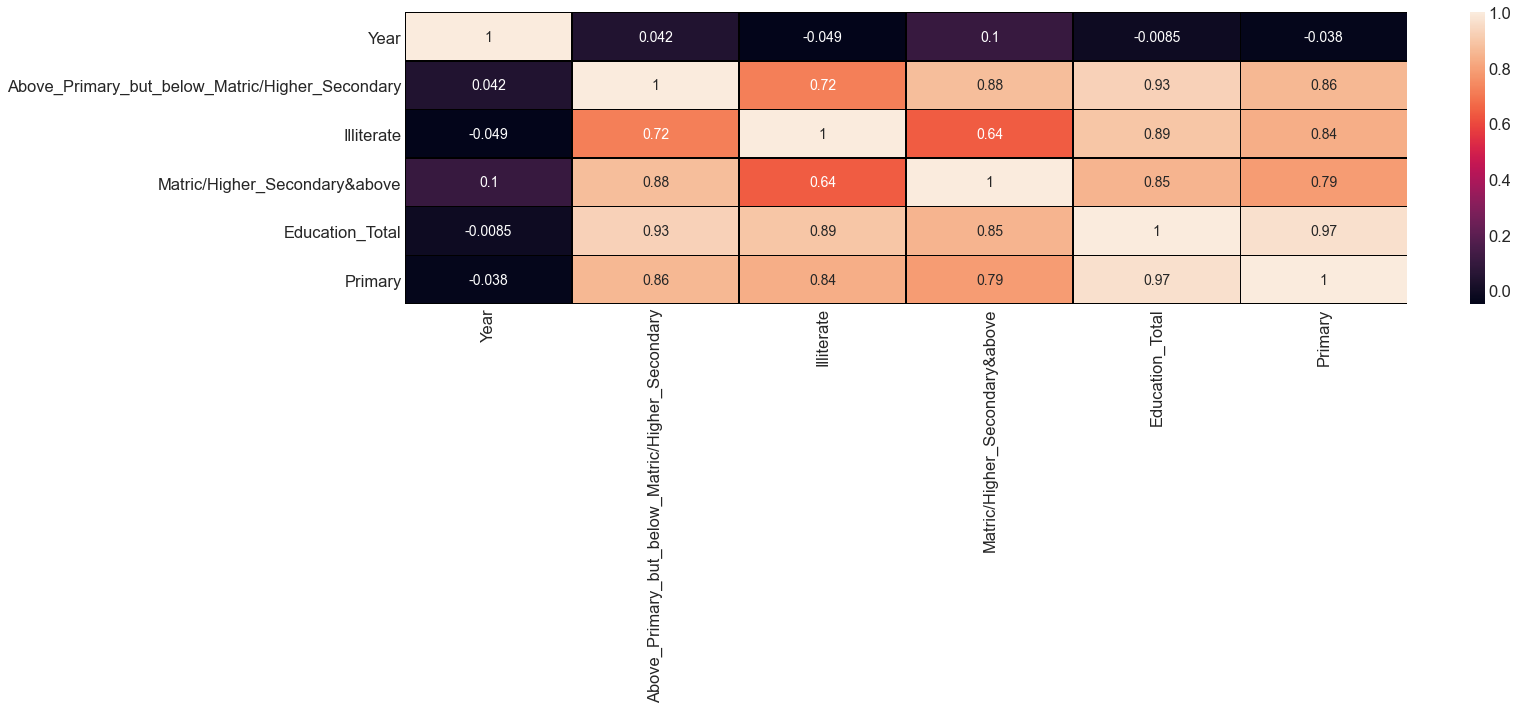

In [20]:
#Plotting heatmap to understand the visualization of correlation
plt.figure(figsize=(20,5))
sns.heatmap(corr,linewidth=0.5,linecolor='black',annot=True)
plt.show()

Observations:

1.Year is the highly negative correlated column among all

2.Illiterate column has the most positively correlated data and it has a maximum value of 89% with the target variable(Education_Total)

3.Positively correlated columns have high impact with the target variable, whereas negatively correlated columns have less or zero impact with the target variable

# Converting categorical data

In [21]:
#Converting categorical into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['State_Name']=le.fit_transform(df['State_Name'].astype(str))

In [22]:
#Checking the datatype of the columns after encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   State_Name                                       350 non-null    int32
 1   Year                                             350 non-null    int64
 2   Above_Primary_but_below_Matric/Higher_Secondary  350 non-null    int64
 3   Illiterate                                       350 non-null    int64
 4   Matric/Higher_Secondary&above                    350 non-null    int64
 5   Education_Total                                  350 non-null    int64
 6   Primary                                          350 non-null    int64
dtypes: int32(1), int64(6)
memory usage: 17.9 KB


In [23]:
#Checking out the dataset after encoding
df.head()

,State_Name,Year,Above_Primary_but_below_Matric/Higher_Secondary,Illiterate,Matric/Higher_Secondary&above,Education_Total,Primary
0,0,2001,12,0,0,16,4
1,1,2001,178,640,64,1565,683
2,2,2001,39,16,12,137,70
3,3,2001,74,91,0,253,88
4,4,2001,87,190,56,586,253


# Checking skewness

In [24]:
df.skew()

State_Name                                         0.000000
Year                                               0.000000
Above_Primary_but_below_Matric/Higher_Secondary    2.818724
Illiterate                                         3.225840
Matric/Higher_Secondary&above                      3.264795
Education_Total                                    2.534917
Primary                                            2.797069
dtype: float64

All the variables has skewness

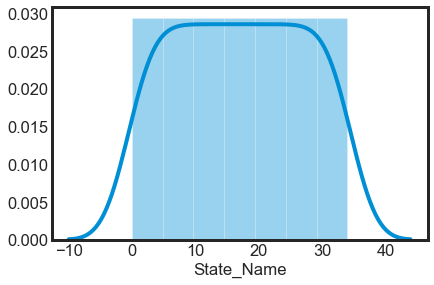

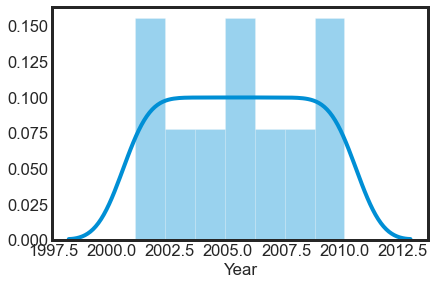

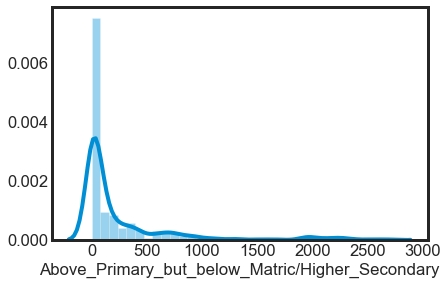

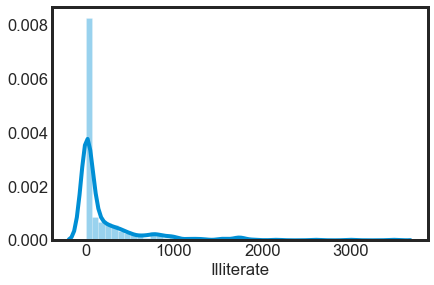

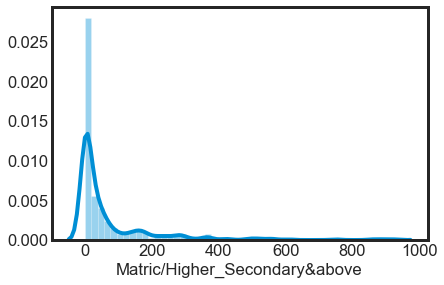

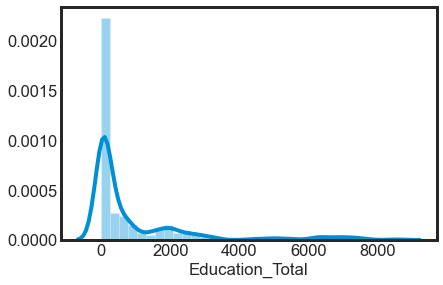

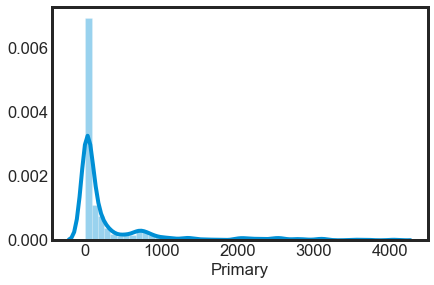

In [25]:
#Checking distribution of data using distribution plot
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

As there are outliers in the data, it is not normally distributed. We can check outliers using boxplot

# Checking outliers

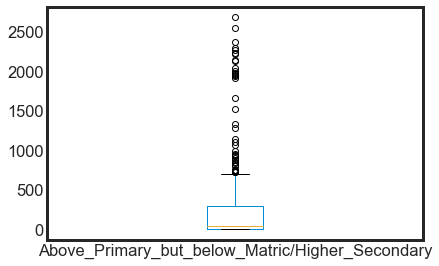

In [26]:
#Plotting boxplot for checking outliers
df['Above_Primary_but_below_Matric/Higher_Secondary'].plot.box()

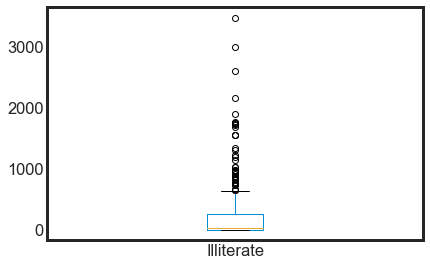

In [27]:
df['Illiterate'].plot.box()

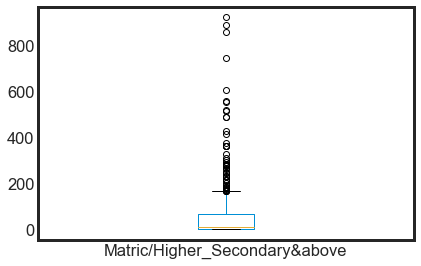

In [28]:
df['Matric/Higher_Secondary&above'].plot.box()

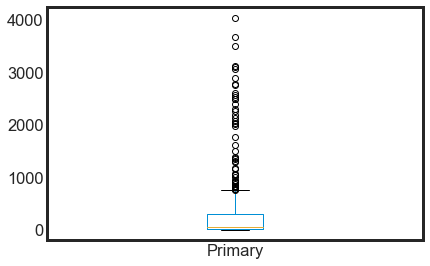

In [29]:
df['Primary'].plot.box()

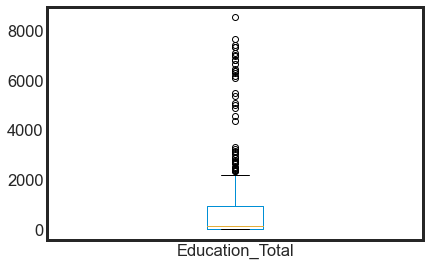

In [30]:
df['Education_Total'].plot.box()

As there are large number of outliers present, we can handle them by using z-score method

# Handling outliers using z-score method

In [31]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))   #converting all values into absolute values
threshold=3    #setting up a threshold
np.where(z>3)

(array([ 19,  19,  19,  19,  20,  30,  54,  54,  54,  55,  65,  65,  65,
         89,  89,  89, 100, 124, 124, 124, 124, 125, 159, 159, 160, 160,
        160, 194, 194, 194, 194, 194, 195, 195, 195, 229, 229, 229, 229,
        229, 230, 230, 230, 230, 264, 264, 264, 264, 264, 265, 265, 265,
        265, 299, 299, 299, 300, 300, 300, 300, 310, 334, 334, 334, 334,
        335, 335, 335, 335], dtype=int64),
 array([3, 4, 5, 6, 2, 6, 2, 3, 5, 2, 3, 5, 6, 3, 5, 6, 3, 3, 4, 5, 6, 2,
        2, 5, 2, 5, 6, 2, 3, 4, 5, 6, 2, 5, 6, 2, 3, 4, 5, 6, 2, 4, 5, 6,
        2, 3, 4, 5, 6, 2, 4, 5, 6, 2, 4, 5, 2, 4, 5, 6, 3, 2, 3, 4, 5, 2,
        4, 5, 6], dtype=int64))

In [32]:
#Removing outliers
df_new=df[(z<3).all(axis=1)]
df_new

,State_Name,Year,Above_Primary_but_below_Matric/Higher_Secondary,Illiterate,Matric/Higher_Secondary&above,Education_Total,Primary
0,0,2001,12,0,0,16,4
1,1,2001,178,640,64,1565,683
2,2,2001,39,16,12,137,70
3,3,2001,74,91,0,253,88
4,4,2001,87,190,56,586,253
...,...,...,...,...,...,...,...
345,30,2010,455,445,48,1644,696
346,31,2010,5,35,0,46,6
347,32,2010,308,166,100,852,278
348,33,2010,31,51,1,154,71


In [33]:
df.shape   #Original dataset dimensions

(350, 7)

In [34]:
df_new.shape   #Original dataset dimensions

(327, 7)

Nearly 20+ rows had outliers and it has been treated by using z-score method

# Percentage loss of data after removing outliers

In [35]:
percentage_loss=((23)/350)*100
print(percentage_loss)

6.571428571428571


Nearly 6% of data has been lost due to the removal of outliers

# Conclusion

Therefore, complete EDA process has been done to the dataset so that it is ready for model training and other process like removing skewness, regression analysis, hyperparameter tuning, serialization, etc. If the r2_score(accuracy) and cross validation score for this model is good, then we can say that it is a good dataset for predicting the total Education of the juveniles who had been arrested from various states of the country the in the years 2001 to 2010